# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D, BatchNormalization, DepthwiseConv2D
from keras.utils import np_utils
from keras import regularizers

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


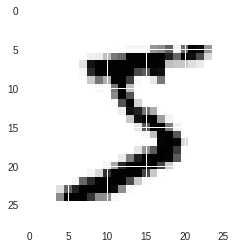

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(SeparableConv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())

# model.add(DepthwiseConv2D((3,3), depth_multiplier=1, activation='relu'))
# model.add(DepthwiseConv2D((3,3), depth_multiplier=2, activation='relu'))
model.add(SeparableConv2D(32, (3,3), activation='relu'))
model.add(SeparableConv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# model.add(DepthwiseConv2D((3,3), depth_multiplier=1, activation='relu'))
# model.add(DepthwiseConv2D((3,3), depth_multiplier=2, activation='relu'))
model.add(SeparableConv2D(32, (3,3), activation='relu'))
model.add(SeparableConv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())

# model.add(DepthwiseConv2D((3,3), depth_multiplier=1, activation='relu'))
model.add(SeparableConv2D(32, (3,3), activation='relu'))
model.add(SeparableConv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(10, 1, activation='relu'))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
separable_conv2d_39 (Separab (None, 24, 24, 32)        1344      
_________________________________________________________________
batch_normalization_38 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
separable_conv2d_40 (Separab (None, 22, 22, 32)        1344      
_________________________________________________________________
batch_normalization_39 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
separable_conv2d_41 (Separab (None, 20, 20, 32)        1344      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 54s 892us/step - loss: 0.2247 - acc: 0.9464
Epoch 2/10
60000/60000 [==============================] - 53s 881us/step - loss: 0.0564 - acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 51s 844us/step - loss: 0.0460 - acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 50s 837us/step - loss: 0.0402 - acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 51s 842us/step - loss: 0.0342 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 51s 845us/step - loss: 0.0323 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 50s 838us/step - loss: 0.0295 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 51s 849us/step - loss: 0.0271 - acc: 0.9912
Epoch 9/10
60000/60000 [==============================] - 51s 849us/step - loss: 0.0252 - acc: 0.9916
Epoch 10/10
60000/60000 [==============================] - 50s 840us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
print(score)

[0.023343566994532012, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[6.50271759e-05 7.63997159e-05 1.41135723e-04 2.90090195e-03
  6.23717569e-05 9.41686594e-05 7.14339039e-05 9.96445119e-01
  6.31181101e-05 8.03467847e-05]
 [5.43644244e-04 6.38721744e-04 9.11321998e-01 7.27830629e-04
  5.21444250e-04 7.87274679e-04 8.36559087e-02 6.03743363e-04
  5.27683995e-04 6.71720016e-04]
 [5.56046189e-06 9.99776185e-01 7.08609650e-06 7.44433964e-06
  4.32899105e-05 8.05234413e-06 6.10830057e-06 1.03573075e-05
  1.29047185e-04 6.87043894e-06]
 [9.99840856e-01 1.35572591e-05 1.47052106e-05 1.54486424e-05
  1.10679712e-05 1.67103863e-05 1.26760551e-05 1.28148149e-05
  4.77938738e-05 1.42576719e-05]
 [1.30664034e-06 1.53515748e-06 1.66514587e-06 1.74932859e-06
  9.99986172e-01 1.89220225e-06 1.43537420e-06 1.45108686e-06
  1.26828002e-06 1.61446894e-06]
 [1.33638878e-06 9.99908328e-01 1.70305657e-06 1.78915570e-06
  3.89403831e-05 1.93528217e-06 1.46805507e-06 1.04071069e-05
  2.35280240e-05 1.05793151e-05]
 [4.61747608e-04 5.42502035e-04 5.88438299e-04 6.18187187e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()